In [4]:
import os
import json
import numpy as np
from os.path import join as pj
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filepath_by_idx = {}

ROOT = '/data/junction'
for idx in range(1, 300):
    filenames = []
    for root, dirs, files in os.walk('{}/{}'.format(ROOT, idx)):
        for file in files:
            filenames.append(pj(root, file))
    candidates = [filename for filename in filenames if os.path.splitext(filename)[1] in ['.avi', '.mkv']]
    if len(candidates) != 1:
        print('! {} Shit candidates {} != 1'.format(idx, len(candidates)))
        for filename in filenames:
            print(filename)
    else:
        filepath_by_idx[idx] = candidates[0]

! 42 Shit candidates 0 != 1
! 62 Shit candidates 0 != 1
! 99 Shit candidates 0 != 1
! 101 Shit candidates 0 != 1
! 102 Shit candidates 0 != 1
! 103 Shit candidates 0 != 1
! 104 Shit candidates 0 != 1
! 105 Shit candidates 0 != 1
! 106 Shit candidates 0 != 1
! 107 Shit candidates 0 != 1
! 108 Shit candidates 0 != 1
! 109 Shit candidates 0 != 1
! 110 Shit candidates 0 != 1
! 111 Shit candidates 0 != 1
! 112 Shit candidates 0 != 1
! 113 Shit candidates 0 != 1
! 114 Shit candidates 0 != 1
! 115 Shit candidates 0 != 1
! 116 Shit candidates 0 != 1
! 117 Shit candidates 0 != 1
! 118 Shit candidates 0 != 1
! 119 Shit candidates 0 != 1
! 120 Shit candidates 0 != 1
! 121 Shit candidates 0 != 1
! 122 Shit candidates 0 != 1
! 123 Shit candidates 0 != 1
! 124 Shit candidates 0 != 1
! 125 Shit candidates 0 != 1
! 126 Shit candidates 0 != 1
! 127 Shit candidates 0 != 1
! 128 Shit candidates 0 != 1
! 129 Shit candidates 0 != 1
! 130 Shit candidates 0 != 1
! 131 Shit candidates 0 != 1
! 132 Shit candid

In [14]:
with open('brightness 01-90.json') as f:
    p1 = json.loads(f.read())
with open('brightness 91-104.json') as f:
    p2 = json.loads(f.read())

In [15]:
p = p1 + p2

In [16]:
pf = [{'id': pi[0], 'brightness': pi[3]} for pi in p]

In [17]:
pf

[{'brightness': 47.0207216962268, 'id': 1},
 {'brightness': 34.349708771936925, 'id': 2},
 {'brightness': 41.98642479018733, 'id': 3},
 {'brightness': 28.69833729461539, 'id': 4},
 {'brightness': 64.29498819628161, 'id': 5},
 {'brightness': 54.941051425536514, 'id': 6},
 {'brightness': 48.73450650287093, 'id': 7},
 {'brightness': 62.4771682790062, 'id': 8},
 {'brightness': 79.39764257216392, 'id': 9},
 {'brightness': 33.114172082000174, 'id': 10},
 {'brightness': 72.22208787714682, 'id': 16},
 {'brightness': 36.25642504682845, 'id': 17},
 {'brightness': 45.7249815465418, 'id': 18},
 {'brightness': 51.71623986677689, 'id': 19},
 {'brightness': 46.39611597709551, 'id': 20},
 {'brightness': 38.935231545415256, 'id': 11},
 {'brightness': 64.42584960242819, 'id': 12},
 {'brightness': 59.38652916649782, 'id': 13},
 {'brightness': 39.098367534322136, 'id': 14},
 {'brightness': 50.766632047870374, 'id': 15},
 {'brightness': 64.83422400458784, 'id': 21},
 {'brightness': 36.98506505681612, 'id':

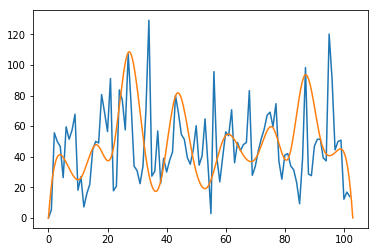

In [15]:
plt.plot(range(len(p[0][1])), p[0][1])
plt.plot(np.linspace(0, len(p[0][1]), 4000), p[0][2])

In [20]:
p.sort(key=lambda x: x[3])

In [24]:
rating = [x[0] for x in p]

In [28]:
[filepath_by_idx[idx] for idx in rating]

['/data/junction/4/The Dark Knight Rises (2012).mkv',
 '/data/junction/47/The.Prestige.2006.XviD.AC3.Dub.HDRip.avi',
 "/data/junction/45/Oderjimost'_2014_HDRip__[scarabey.org].avi",
 '/data/junction/10/Boitsovskii.Klub.1999.RUS.BDRip.XviD.AC3.-AngelOfTrue.avi',
 '/data/junction/2/Krestnuj.otetc.I.1972.MPEG4.HDTVRip.mkv',
 '/data/junction/17/Slavnye_parni_1990_BDRip_by_Dalemake.avi',
 '/data/junction/22/Se7en.1995.BDRip.AVC.mkv',
 '/data/junction/23/Molchanie.yagnyat.1991.BDRip.avi',
 '/data/junction/11/The.Lord.of.the.Rings-The Fellowship.of.the.Ring.2001.hdrip-avc.dexter_lex.mkv',
 '/data/junction/14/Nachalo_(2010).HDRip-AVC.ac3.Dub.Sub_[All.Films][RG].mkv',
 '/data/junction/33/Zelenaya_milya_HDRip_dub_[scarabey.org]_by_Scarabey.avi',
 '/data/junction/46/Gladiator.2000.Theatrical.Cut_[scarabey.org].avi',
 '/data/junction/3/kryjostny 2.avi',
 '/data/junction/50/Apocalypse.Now.1979.Redux.version.HDRip.1,46Gb.MVO(Soyuz).MVO(Pozitiv).ALLFILMS.RG/Apocalypse.Now.1979.Redux.version.HDRip.1,4

In [29]:
rating[0]

4

In [45]:
query_base = "INSERT INTO brightness (id, movie_id, brightness, graph_src, graph_smooth) VALUES ({}, {}, {}, '{}', '{}');"

In [52]:
for pi in p[40:]:
    print(query_base.format(pi[0], pi[0], pi[3], json.dumps(pi[1]), json.dumps(pi[2])))

INSERT INTO brightness (id, movie_id, brightness, graph_src, graph_smooth) VALUES (27, 27, 65.88007630244503, '[0.0012381213450292398, 62.15484752284356, 24.427866885964914, 83.45751968475876, 83.90100703399123, 66.10136824287282, 48.150608854166656, 23.608601716008774, 50.777533520650586, 56.201215673428365, 43.90631305007311, 71.46672833972951, 99.35927553636697, 26.24546942799708, 109.25357494700287, 41.95874500365497, 123.7297490168129, 72.38176524122807, 110.38301476425437, 127.64387578490496, 109.65993242872808, 70.65395546326755, 56.68019276315789, 73.11011000274122, 66.00619311038011, 112.06766987755849, 79.47459769005847, 102.33476837171054, 56.58689841191518, 107.19828521929823, 71.45224069809942, 118.89265839181286, 34.90895975694444, 30.75927194809942, 52.37789944261697, 50.453852602339175, 62.464574532163745, 67.97185924159358, 116.32551043220032, 72.71685598775585, 70.7758172130848, 30.348035579312864, 54.18109143457605, 63.79960298519737, 88.24049779513888, 114.353208551